In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from data_gen import get_agent_distribution_and_losses_nels, generate_losses, get_types_and_noise, get_types_loss_and_noise, generate_covariates
from utils import compute_continuity_noise
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

In [2]:
np.random.seed(0)
d=9
prev_beta = np.ones(d)/np.sqrt(d)

In [3]:
agent_dist, all_types_and_losses, all_labels, rep_losses, sigma = get_agent_distribution_and_losses_nels(n=1000000,
                                                                                              prev_beta=prev_beta, n_clusters=8,
                                                                                              seed=0)

In [4]:
sample_idx = np.random.choice(list(range(len(all_types_and_losses))), 1000)
sample_types = all_types_and_losses[sample_idx]
sample_labels = all_labels[sample_idx]
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(sample_types)

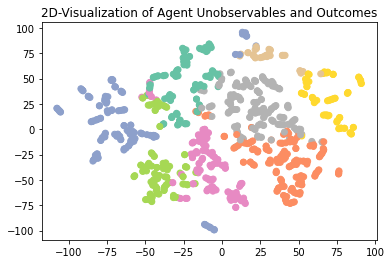

In [5]:
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=sample_labels, cmap="Set2")
plt.title("2D-Visualization of Agent Unobservables and Outcomes")
plt.savefig("figs/paper-figure-5.pdf")